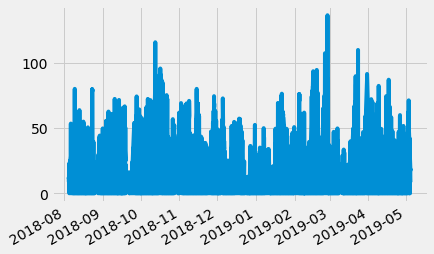

In [33]:
import pandas as pd
from datetime import datetime
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df = pd.read_csv('merge.csv')

df = df[df.aqiDescription != 'Incomplete ']
df = df.loc[df['name'] == 'Praha 6-Brevnov']

df['DateToUTC'] = df['DateToUTC'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S.%f UTC'))
#print (df)
x = df['DateToUTC']
y = df['NO2']

# plot
plt.plot(x,y)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [34]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [35]:
from pylab import rcParams


p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,                                enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:120181.50854461486
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:116099.613485309
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:112898.39985248806
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:105254.11900443984
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:111010.70084558605
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:105323.52535757323
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:107890.09256116157


In [21]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/home/natalia/miniconda3/envs/tf/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7645      0.005    167.719      0.000       0.756       0.773
ma.L1         -1.0000      0.076    -13.089      0.000      -1.150      -0.850
ar.S.L12      -0.5546      0.004   -129.248      0.000      -0.563      -0.546
sigma2       136.5358     10.482     13.026      0.000     115.992     157.080


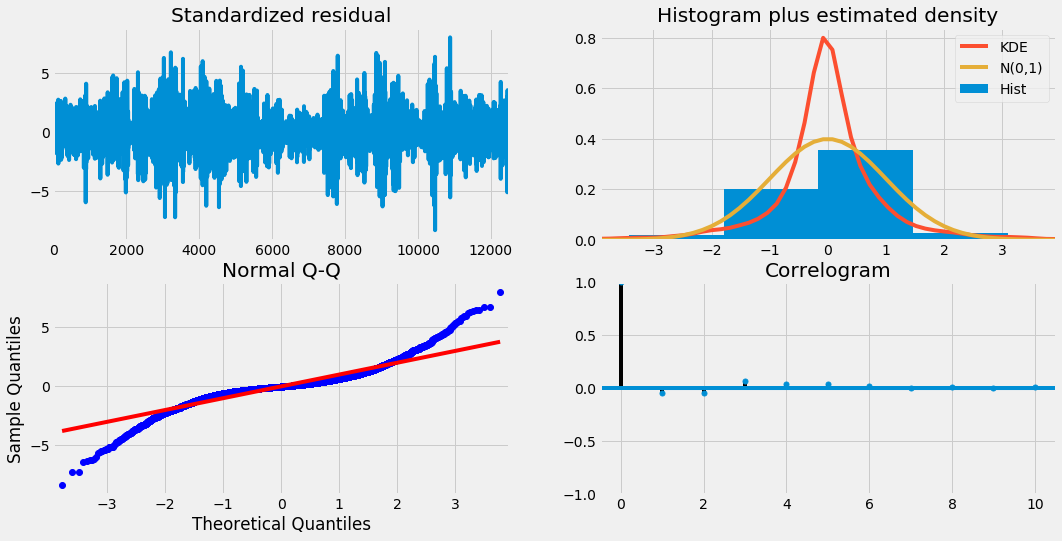

In [22]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

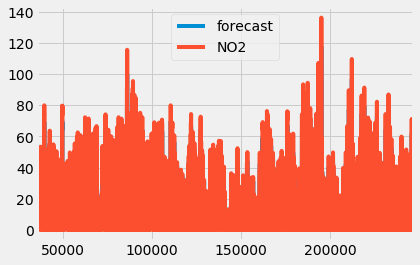

In [30]:
mod_fit.plot_predict(dynamic=False)
plt.show()

In [24]:
pred = results.get_prediction(start=pd.to_datetime('2019-04'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('NO2 index')
plt.legend()
plt.show()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'